In [1]:
import numpy as np
import pandas as pd 
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
##Get the data set

In [14]:
column_names=["user_id","item_id","rating","timestamp"]

df = pd.read_csv("ml-100k/u.data",sep='\t',names=column_names)



In [15]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [16]:
df.shape


(100000, 4)

In [20]:
#to check unique ids
df["user_id"].nunique()

943

In [19]:
df["item_id"].nunique()

1682

In [35]:
movies_titles=pd.read_csv("ml-100k/u.item",sep='\|',header= None)

In [36]:
movies_titles.shape

(1682, 24)

In [37]:
movies_titles = movies_titles[[0,1]]

movies_titles.head()

In [38]:
movies_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [39]:
movies_titles.columns = ['item_id','title']

In [40]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [41]:
df=pd.merge(df,movies_titles,on="item_id")

In [43]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [44]:
#Exploratory Data Analysis

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [47]:
df


,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [52]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [54]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [64]:
ratings= pd.DataFrame(df.groupby('title').mean()['rating'])

In [65]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [72]:
ratings ['No of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-72-181a534cae47>, line 1)

In [73]:
ratings

,rating,No of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


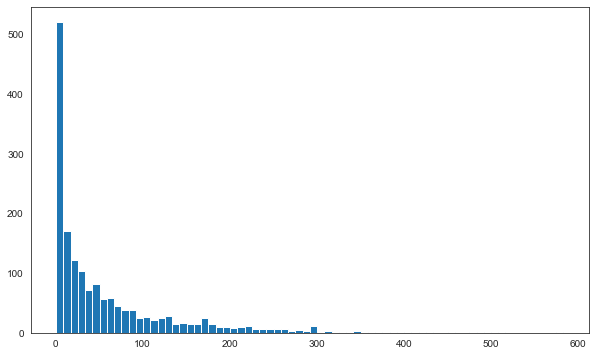

In [71]:
plt.figure(figsize=(10,6))
plt.hist(ratings['No of ratings'],bins= 70)
plt.show()

In [76]:
moviemat=df.pivot_table(index="user_id",columns = "title",values = "rating")

In [77]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [83]:
max_ratings = ratings.sort_values("No of ratings",ascending = False)

In [84]:
max_ratings.head()

,rating,No of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [91]:
starwars_user_ratings=moviemat["Star Wars (1977)"]

In [92]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [96]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [97]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [101]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns = ["correlation"])

In [102]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [104]:
corr_starwars.sort_values('correlation',ascending = False)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [117]:
corr_starwars=corr_starwars.join(ratings['No of ratings'])

In [118]:
corr_starwars.head()

,correlation,No of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [130]:
predictions=corr_starwars[corr_starwars['No of ratings']>100].sort_values('No of ratings',ascending = False)

In [132]:
predictions.head()

,correlation,No of ratings
title,,
Star Wars (1977),1.000000,583
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485


In [142]:
# this was the step by step working of movie recomendation

In [139]:
# the complete code starts from here




def movie_predictions(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns = ['Correlaton'])
    corr_movie.dropna(inplace = True)
    corr_movie =corr_movie.join(ratings['No of ratings'])
    Predictions=corr_movie[corr_movie['No of ratings']>100].sort_values('Correlaton',ascending = False)
    
    return Predictions
    

In [140]:
Predictions = movie_predictions('187 (1997)')

In [141]:
Predictions.head()

,Correlaton,No of ratings
title,,
Star Trek: Generations (1994),1.0,116
Maverick (1994),1.0,128
Conan the Barbarian (1981),1.0,107
"Magnificent Seven, The (1954)",1.0,121
Cool Hand Luke (1967),1.0,164
